In [1]:
#Valeurs recherchées:
#1)Pente journalière 
#2)C1
#3)HDR
#Modules

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [24]:
#On détaille le procédé pour le premier document
doc=pd.read_csv("/users/2024/ds2/119008303/Documents/KinectDataGreenhouse/Box1_Temoin.csv")

In [13]:
#Te=15 minutes et T=1 jour, X est le temps en minutes
T=96 #96*Te= 1 jour
X=np.array(doc['X']).reshape(-1,1) #temps (i unité vaut 15 minutes) et reshape(-1,1) passe les coordonnées X en une colonne
Y=np.array(doc['Y'])
plt.plot(X,Y) 

In [ ]:
#1) Calcul de GR
#Regression linéaire sur [X,Y]
r1=LinearRegression()
r1.fit(X,Y)
plt.plot(r1.predict(X))
plt.plot(Y)

In [ ]:
#Création des groupes, ici un groupe correspond aux mesures sur un jour
def jour(k,X,Y):
    return [X[(k*T):((k+1)*T)],Y[(k*T):((k+1)*T)]] #renvoie Xr et Yr les coordonnées de X et Y réduites au jour n

N=int(len(X)/96) #nombre de jours d'échantillonage, ici N=12

#Affichage des N pentes journalières
Pred=[]
for i in range(N):
    Xr,Yr=jour(i,X,Y)[0],jour(i,X,Y)[1]
    r1=LinearRegression()
    r1.fit(Xr,Yr)               #regréssion linéaire sur le jour i
    Pred.append(r1.predict(Xr))
    plt.plot(Xr,r1.predict(Xr))

In [ ]:
#Fonction donnant la pente journalière du jour n:
def Pente(n,X,Y):
    Xr,Yr=jour(n,X,Y)[0],jour(n,X,Y)[1]
    r1=LinearRegression()
    r1.fit(Xr,Yr)
    return r1.predict(Xr)  #renvoie a*t+b du jour n en array

In [ ]:
#Coefficient de la régression linéaire
GR=r1.coef_

In [ ]:
#2) Calcul du C1
#Signal périodique du jour n:
def y(n,X,Y):
    return jour(n,X,Y)[1]-Pente(n,X,Y)

In [ ]:
#Coefficients a1 et b1
def a(n,X,Y):
    if n==0:
        return (1/T)*np.trapz((y(n,X,Y)*np.cos(2*np.pi/T)))
    else:
        return (2/T)*np.trapz((y(n,X,Y)*np.cos(2*np.pi/T)))
def b(n,X,Y):
    return (2/T)*np.trapz((y(n,X,Y)*np.sin(2*np.pi/T)))

In [ ]:
def Fourier(n,X,Y): #On calcule c1(n) et HDR(n) 
    an,bn=a(n,X,Y),b(n,X,Y)
    cn=np.sqrt(an**2+bn**2)
    E=np.trapz(y(n)**2)/T  #Intégration par méthode des trapèzes
    sous=0.5*cn**2
    HDR=100*np.sqrt((E-sous)/(sous))
    return cn,HDR

In [ ]:
#Création des array des features sur les 12 jours du fichier à l'origine de X,Y:
def feature(X,Y):
    GR,C1,HDR=[],[],[]
    for i in range(12):
        Xr,Yr=jour(i,X,Y)
        reg=LinearRegression()
        reg.fit(Xr,Yr)
        GR.append(reg.coef_)  #coefficient 'a' de reg=a*t+b
        y=Yr-Pente(X,Y)
        cn,h=Fourier(n,X,Y)
        C1.append(cn)
        HDR.append(h)
    return GR,C1,HDR  

In [ ]:
#Création des X,Y des autres fichiers
doc2=pd.read_csv("/users/2024/ds2/119008303/Documents/KinectDataGreenhouse/Box2_Stress_hydrique.csv")
doc3=pd.read_csv("/users/2024/ds2/119008303/Documents/KinectDataGreenhouse/Box3_stress_salin.csv")
doc4=pd.read_csv("/users/2024/ds2/119008303/Documents/KinectDataGreenhouse/Box4_Temoin.csv")
X2=np.array(doc2['X']).reshape(-1,1) 
Y2=np.array(doc2['Y'])
X3=np.array(doc3['X']).reshape(-1,1) 
Y3=np.array(doc3['Y'])
X2=np.array(doc4['X']).reshape(-1,1) 
Y2=np.array(doc4['Y'])

In [ ]:
#Calcul des features de chaque fichier
GR1,C1,H1=feature(X,Y)
GR2,C2,H2=feature(X2,Y2)
GR3,C3,H3=feature(X3,Y3)
GR4,C4,H4=feature(X4,Y4)

In [ ]:
#Affichage des features
fig = plt.figure()
# syntax for 3-D projection
ax= plt.axes(projection ='3d')
ax.scatter(GR1,C1,H1,c="blue")
ax.scatter(GR2,C2,H2,c="red")
ax.scatter(GR3,C3,H3,c="green")
ax.scatter(GR4,C4,H4,c="orange")
ax.set_title('Features GR,C1 et HDR des 4 fichiers')

Text(0.5, 0.92, 'Scatter plot 3D Test')

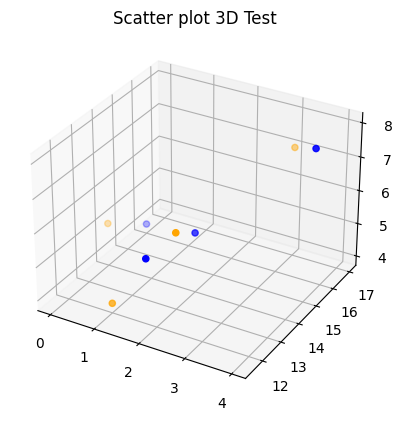

In [35]:
#Test d'affichage 3D
x,y,z=[0,1,2,3],[14,12,13,17],[5,4,6,7]
x1,y1,z1=[2,2,0,4],[11.5,14,16,15.5],[6,5.5,4,8]
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter(x,y,z,c="orange")
ax.scatter(x1,y1,z1,c="blue")
ax.set_title('Scatter plot 3D Test')